In [1]:
import pandas as pd

# Load the datasets
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

# View the first few rows
print(customers.head())
print(products.head())
print(transactions.head())


  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

In [2]:
# Check the structure of datasets
print(customers.info())
print(products.info())
print(transactions.info())

# Summary statistics
print(customers.describe(include='all'))
print(products.describe(include='all'))
print(transactions.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------

In [3]:
# Check for missing values
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())

# Check for duplicates
print(customers.duplicated().sum())
print(products.duplicated().sum())
print(transactions.duplicated().sum())


CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64
0
0
0


In [4]:
# Example: Drop duplicates
customers.drop_duplicates(inplace=True)
products.drop_duplicates(inplace=True)
transactions.drop_duplicates(inplace=True)


In [5]:
# Merge datasets
transactions = transactions.merge(customers, on='CustomerID', how='left')
transactions = transactions.merge(products, on='ProductID', how='left')

# Inspect the merged dataset
print(transactions.head())


  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue  Price_x     CustomerName         Region  SignupDate  \
0      300.68   300.68   Andrea Jenkins         Europe  2022-12-03   
1      300.68   300.68  Brittany Harvey           Asia  2024-09-04   
2      300.68   300.68  Kathryn Stevens         Europe  2024-04-04   
3      601.36   300.68  Travis Campbell  South America  2024-04-11   
4      902.04   300.68    Timothy Perez         Europe  2022-03-15   

                       ProductName     Category  Price_y  
0  ComfortLiving Bluetooth Speaker  Electronics   300.68  
1  ComfortLiving Bluetooth Speaker

In [6]:
# Customers by region
print(customers['Region'].value_counts())

# Signup trends
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
print(customers['SignupDate'].dt.year.value_counts())


Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64
SignupDate
2024    79
2022    64
2023    57
Name: count, dtype: int64


Category
Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: count, dtype: int64


<AxesSubplot: >

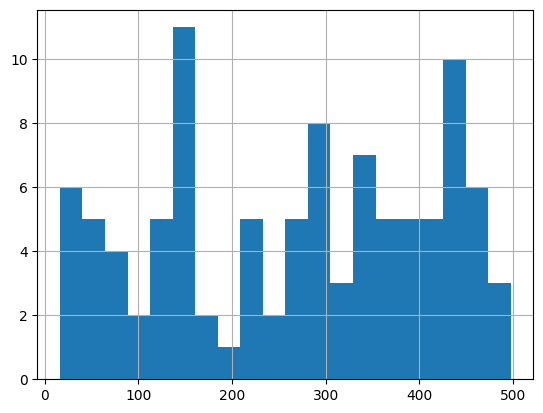

In [7]:
# Products by category
print(products['Category'].value_counts())

# Price distribution
products['Price'].hist(bins=20)


In [8]:
# Top products
top_products = transactions.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False)
print(top_products.head())

# Revenue by region
region_revenue = transactions.groupby('Region')['TotalValue'].sum()
print(region_revenue)


ProductName
ActiveWear Smartwatch    100
SoundWave Headphones      97
HomeSense Desk Lamp       81
ActiveWear Rug            79
SoundWave Cookbook        78
Name: Quantity, dtype: int64
Region
Asia             152074.97
Europe           166254.63
North America    152313.40
South America    219352.56
Name: TotalValue, dtype: float64


<AxesSubplot: xlabel='TransactionDate'>

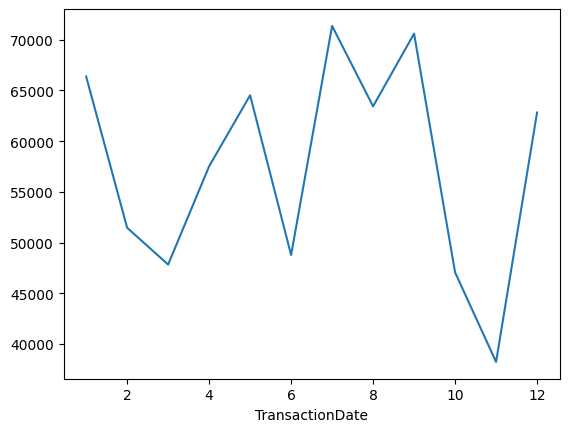

In [9]:
# Convert dates
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# Sales trend
transactions.groupby(transactions['TransactionDate'].dt.month)['TotalValue'].sum().plot()


Customers by Region:
 Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64


<AxesSubplot: title={'center': 'Customers by Region'}, xlabel='Region'>

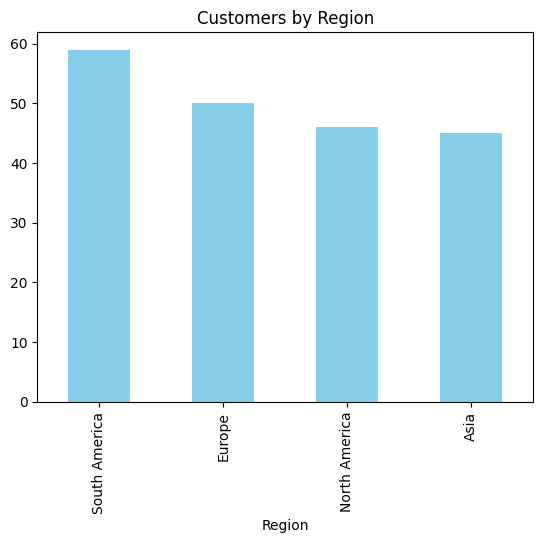

In [14]:
## Customers Analysis
# Customers by region
region_counts = customers['Region'].value_counts()
print("Customers by Region:\n", region_counts)
region_counts.plot(kind='bar', title='Customers by Region', color='skyblue')


Signup Trends by Year:
 SignupDate
2022    64
2023    57
2024    79
Name: count, dtype: int64


<AxesSubplot: title={'center': 'Signup Trends by Year'}, xlabel='SignupDate'>

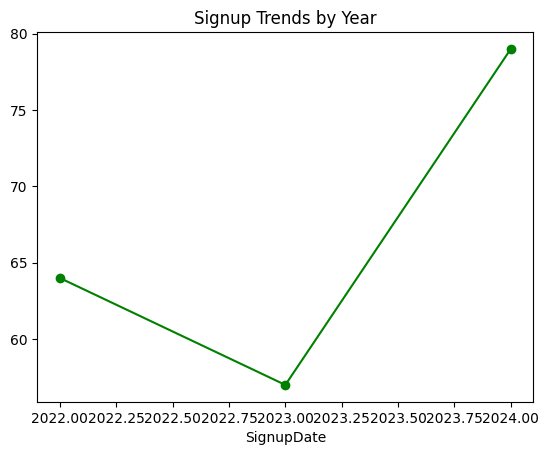

In [15]:
signup_trends = customers['SignupDate'].dt.year.value_counts().sort_index()
print("Signup Trends by Year:\n", signup_trends)
signup_trends.plot(kind='line', title='Signup Trends by Year', color='green', marker='o')

Revenue by Region:
 Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64


<AxesSubplot: title={'center': 'Revenue by Region'}, xlabel='Region'>

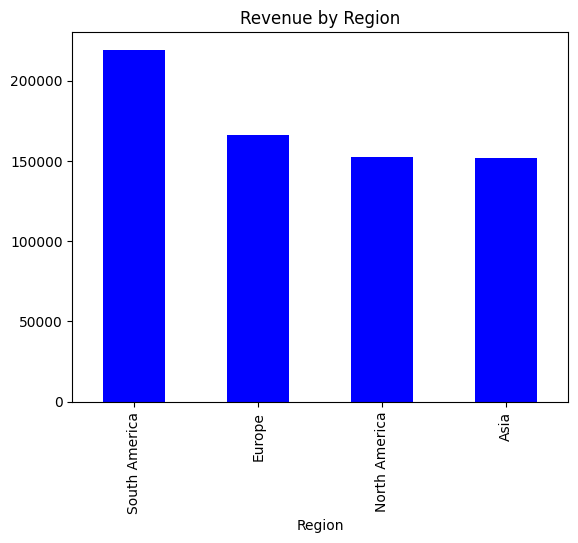

In [16]:
# Revenue by region
region_revenue = transactions.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
print("Revenue by Region:\n", region_revenue)
region_revenue.plot(kind='bar', title='Revenue by Region', color='blue')

Monthly Sales Trend:
 TransactionDate
2023-12     3769.52
2024-01    66376.39
2024-02    51459.27
2024-03    47828.73
2024-04    57519.06
2024-05    64527.74
2024-06    48771.18
2024-07    71366.39
2024-08    63436.74
2024-09    70603.75
2024-10    47063.22
2024-11    38224.37
2024-12    59049.20
Freq: M, Name: TotalValue, dtype: float64


<AxesSubplot: title={'center': 'Monthly Sales Trend'}, xlabel='TransactionDate'>

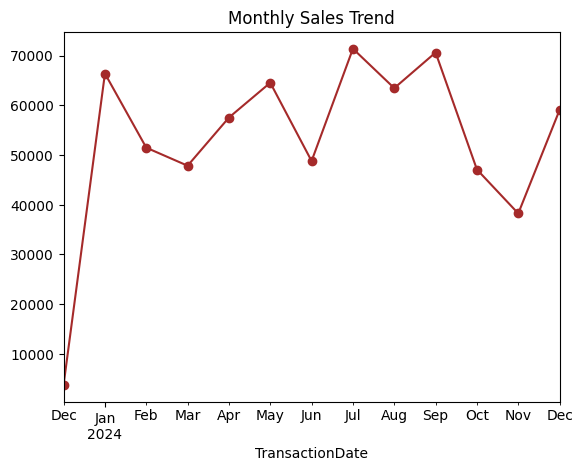

In [17]:
monthly_sales = transactions.groupby(transactions['TransactionDate'].dt.to_period('M'))['TotalValue'].sum()
print("Monthly Sales Trend:\n", monthly_sales)
monthly_sales.plot(title='Monthly Sales Trend', color='brown', marker='o')